# Маркетинговый анализ рекламных компаний развлекательного приложения 

## Загрузка данных и подготовка их к анализу

### Описание данных   
    
В распоряжении три датасета в формате csv: 

    Первый хранит лог сервера с информацией о посещениях сайта,
    Второй — информацию о заказах, 
    Третий — информацию о расходах на рекламу.

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('....csv'),
    pd.read_csv('....csv'),
    pd.read_csv('....csv')
)

### Cтруктура данных в датасетах, проверка на пропуски и дубликаты

In [3]:
# функция ознакомления с датасетом
def data_review (df):
    print('Первые 5 строк датасета:')
    display(df.head())
    print('Типы данных и количество заполненных строк в колонках:')
    print('')
    df.info()
    print('')
    print('Количество пропусков в процентах от общего числа строк:')
    print('')
    missed_quantity = pd.DataFrame((df.isna().mean()*100).round(2)).style\
    .background_gradient('OrRd')
    display(missed_quantity)

**Изучим датасет visits:**

In [4]:
data_review(visits)

Первые 5 строк датасета:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Типы данных и количество заполненных строк в колонках:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Количество пропусков в процентах от общего числа строк:



,0
User Id,0.000000
Region,0.000000
Device,0.000000
Channel,0.000000
Session Start,0.000000
Session End,0.000000


Пропусков в visits нет. 

Приведем названия колонок к "змеиному" регистру и изменим тип данных колонок с информацией о дате и времени с object на datetime:

In [5]:
# напишем функцию для перевода названия колонок к змеиному регистру

def snake_format(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    display(df.head(2))

In [6]:
# приведение названия колонок к змеиному регистру и проверка выполнения
snake_format(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


In [7]:
# изменение типа данных 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Проверим на строки-дубликаты и дублирование уникальных значений в столбцах:

In [8]:
# напишем функцию для проверки на строки-дубликаты и значений столбцов на дубликаты

def seach_duplicates(df, columns=[]):
    print('Количество полных строк-дубликатов:', df.duplicated().sum())
    print('')
    for i in columns:
        print('Значения в столбце {}'.format(i))
        print('_'*40)
        display(df[i].value_counts())

In [9]:
seach_duplicates(visits, ['region', 'device', 'channel'])

Количество полных строк-дубликатов: 0

Значения в столбце region
________________________________________


United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

Значения в столбце device
________________________________________


iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Значения в столбце channel
________________________________________


organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Дубликаты не обнаружены. 

**Проверим датасет с заказами:**

In [10]:
data_review(orders)

Первые 5 строк датасета:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Типы данных и количество заполненных строк в колонках:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Количество пропусков в процентах от общего числа строк:



,0
User Id,0.000000
Event Dt,0.000000
Revenue,0.000000


Пропусков нет. 

Приведем названия колонок к "змеиному" регистру и изменим тип данных колонок с информацией о дате и времени с object на datetime:

In [11]:
# приведение названия колонок к змеиному регистру и проверка выполнения
snake_format(orders)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим на дубликаты:

In [13]:
seach_duplicates(orders)

Количество полных строк-дубликатов: 0



Столбцов для проверки на значения-дубликаты в этом датасете нет.

**Проверим датасет с расходами:**

In [14]:
data_review(costs)

Первые 5 строк датасета:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Типы данных и количество заполненных строк в колонках:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Количество пропусков в процентах от общего числа строк:



,0
dt,0.000000
Channel,0.000000
costs,0.000000


Пропусков нет. 

Приведем названия колонок к "змеиному" регистру и изменим тип данных колонок с информацией о дате и времени с object на datetime:

In [15]:
# приведение названия колонок к змеиному регистру и проверка выполнения
snake_format(costs)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим на полные дубликаты и дублирование названий в столбце channel:

In [17]:
seach_duplicates(costs, ['channel'])

Количество полных строк-дубликатов: 0

Значения в столбце channel
________________________________________


FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

Дубликатов нет.

### Вывод

Дубликаты и пропуски в датасетах visits, orders, costs не найдены.

Привели названия столбцов к написанию в "змеином" регистре и изменили типы данных в столбцах с информацией о дате и времени (с object на datetime) 

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Создадим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV и ROI.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [18]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
    if isinstance(ad_costs['dt'][0], pd.Timestamp):
        ad_costs = ad_costs.copy()
        ad_costs['dt'] = ad_costs['dt'].dt.date
        
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [19]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [26]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769  


In [27]:
# определяем мин и мах дату привлечения

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
min_date, max_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Минимальная дата привлечения - 1 мая 2019 года.

Максимальная дата привлечения - 27 октября 2019 года.

Напишем функцию для анализа доли платящих пользователей по разным критериям:

In [28]:
# функция для анализа доли платящих пользователей по заданным критериям
def paying_part(characteristic):
    paying = (profiles
     .pivot_table(
         index=characteristic,
         values=['user_id', 'payer'],
         aggfunc={'user_id':'nunique', 'payer':['sum', 'mean']})
    )

    paying.columns = ['paying_ratio_%', 'payer_count', 'all_users']
    paying['paying_ratio_%'] = (paying['paying_ratio_%'] * 100).round(2)
    (paying.sort_values(by='paying_ratio_%', ascending=False)
     ['paying_ratio_%'].plot(kind='bar', title='Доля платящих пользователей')
    )
    
    return paying.sort_values(by='paying_ratio_%', ascending=False)

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

,paying_ratio_%,payer_count,all_users
region,,,
United States,6.90,6902,100002
Germany,4.11,616,14981
UK,3.98,700,17575
France,3.80,663,17450


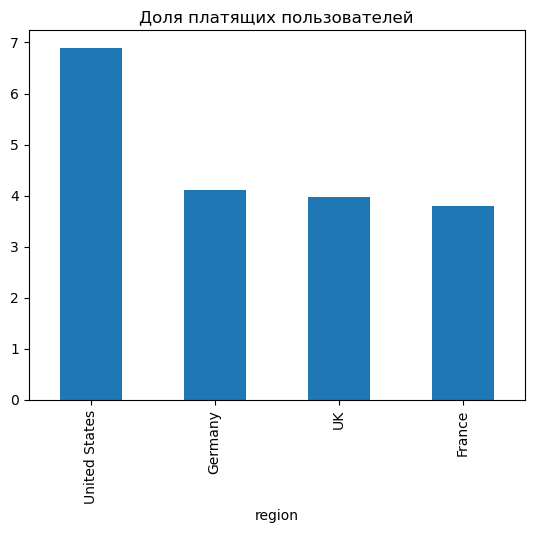

In [29]:
paying_part('region')

Приложением пользуются пользователи из следующих стран:

    - США
    - Германия
    - Великобритания
    - Франция
Рейтинг конверсии в платящих пользователей выглядит так:

    - США  6,9 %
    - Германия 4,11 %
    - Великобритания 3,98 %
    - Франция 3, 79 %

Проанализируем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

,paying_ratio_%,payer_count,all_users
device,,,
Mac,6.36,1912,30042
iPhone,6.21,3382,54479
Android,5.85,2050,35032
PC,5.05,1537,30455


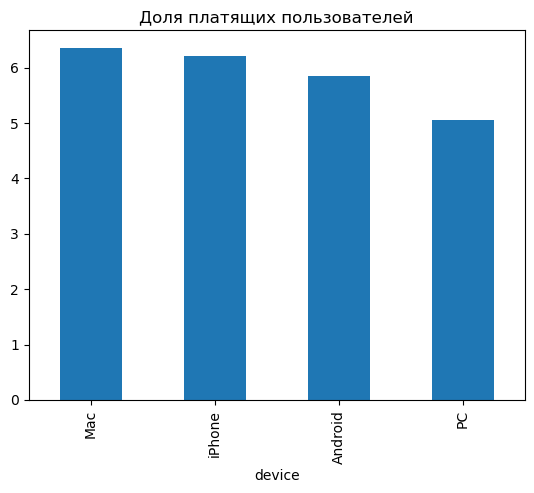

In [30]:
paying_part('device')

Клиенты пользуются следующими устройствами:

- Mac
- iPhone
- PC
- Android

Рейтинг конверсии в платящих пользователей выглядит так:
- Mac 6,36 %
- iPhone 6,21 %
- Android 5,85%
- PC 5,05 %

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

,paying_ratio_%,payer_count,all_users
channel,,,
FaceBoom,12.20,3557,29144
AdNonSense,11.34,440,3880
lambdaMediaAds,10.47,225,2149
TipTop,9.60,1878,19561
RocketSuperAds,7.91,352,4448
WahooNetBanner,5.30,453,8553
YRabbit,3.83,165,4312
MediaTornado,3.57,156,4364
LeapBob,3.06,262,8553


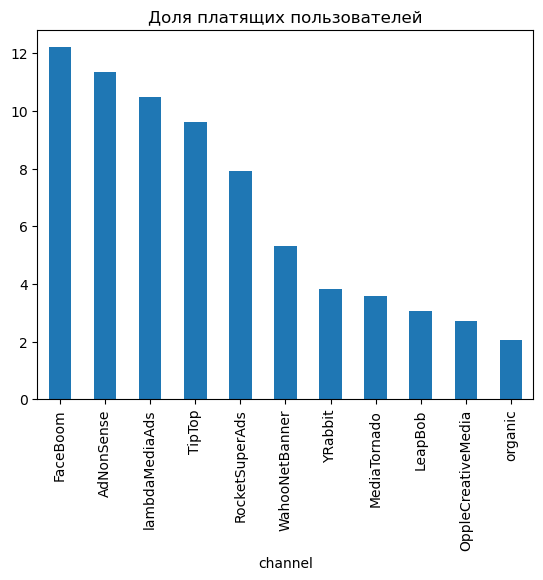

In [31]:
paying_part('channel')

Топ-5 рекламных каналов по конверсии в платящих пользователей:

    FaceBoom - 12,20 %
    AdNonSense - 11,34 %
    lambdaMediaAds - 10, 47 %
    TipTop - 9,6 %
    RocketSuperAds - 7,91 %

### Вывод


В ходе исследовательского анализа составили профили пользователей в датасете profiles. Определили минимальную и максимальную даты привлечения. Посчитали доли платящих пользователей по разным критериям.
     
     
Минимальная дата привлечения - 1 мая 2019 года.

Максимальная дата привлечения - 27 октября 2019 года.

Рейтинг конверсии в платящих пользователей по странам:

- США  6,9 %
- Германия 4,11 %
- Великобритания 3,98 %
- Франция 3, 79 %

Рейтинг конверсии в платящих пользователей по устройствам:

- Mac 6,36 %
- iPhone 6,21 %
- Android 5,85%
- PC 5,05 %


Топ-5 рекламных каналов по конверсии в платящих пользователей:

- FaceBoom - 12,2 %
- AdNonSense - 11,34 %
- lambdaMediaAds - 10,47%
- TipTop - 9,6 %
- RocketSuperAds - 7,91 %

## Маркетинг

In [32]:
costs.head(2)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


Посчитаем общую сумму расходов на маркетинг:

In [33]:
print('Общая сумма расходов составила', costs['costs'].sum().round(0), 'ден.ед.')

Общая сумма расходов составила 105497.0 ден.ед.


Посмотрим распределение трат по рекламным источникам:

,costs,"ratio_costs, %"
channel,,
YRabbit,944.22,1.0
MediaTornado,954.48,1.0
lambdaMediaAds,1557.60,1.0
LeapBob,1797.60,2.0
RocketSuperAds,1833.00,2.0
OppleCreativeMedia,2151.25,2.0
AdNonSense,3911.25,4.0
WahooNetBanner,5151.00,5.0
FaceBoom,32445.60,31.0


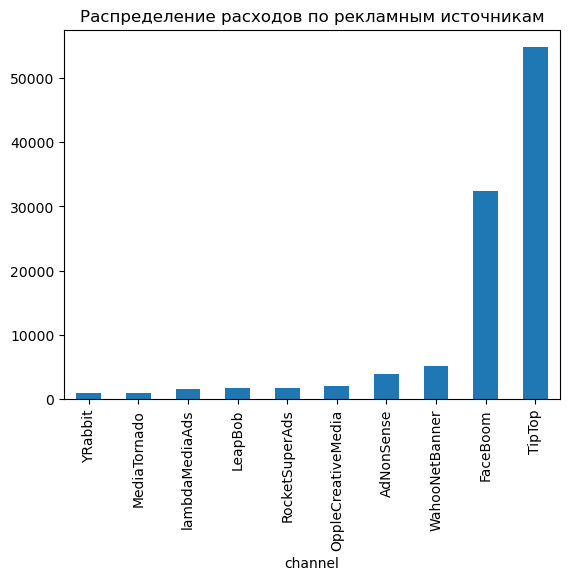

In [34]:
channel_costs = (costs
                 .pivot_table(
                     index='channel',
                     values='costs',
                     aggfunc='sum')
                 .sort_values(by='costs')
                )
channel_costs['ratio_costs, %'] = (round((channel_costs['costs'] / 
                                          costs['costs'].sum()) * 100)
                                  )
display(channel_costs)
channel_costs['costs'].plot(kind='bar', title='Распределение расходов по рекламным источникам');

По затратам на рекламу сильно выбиваются два канала: FaceBoom и TipTop. На канал TipTop приходится половина всех расходов - 52%, на канал FaceBoom треть расходов - 31%.

Расходы на остальные каналы распределены почти равномерно: от 1 до 5 %.

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [35]:
costs['week_dt'] = costs['dt'].dt.isocalendar().week
costs['month_dt'] = costs['dt'].dt.month

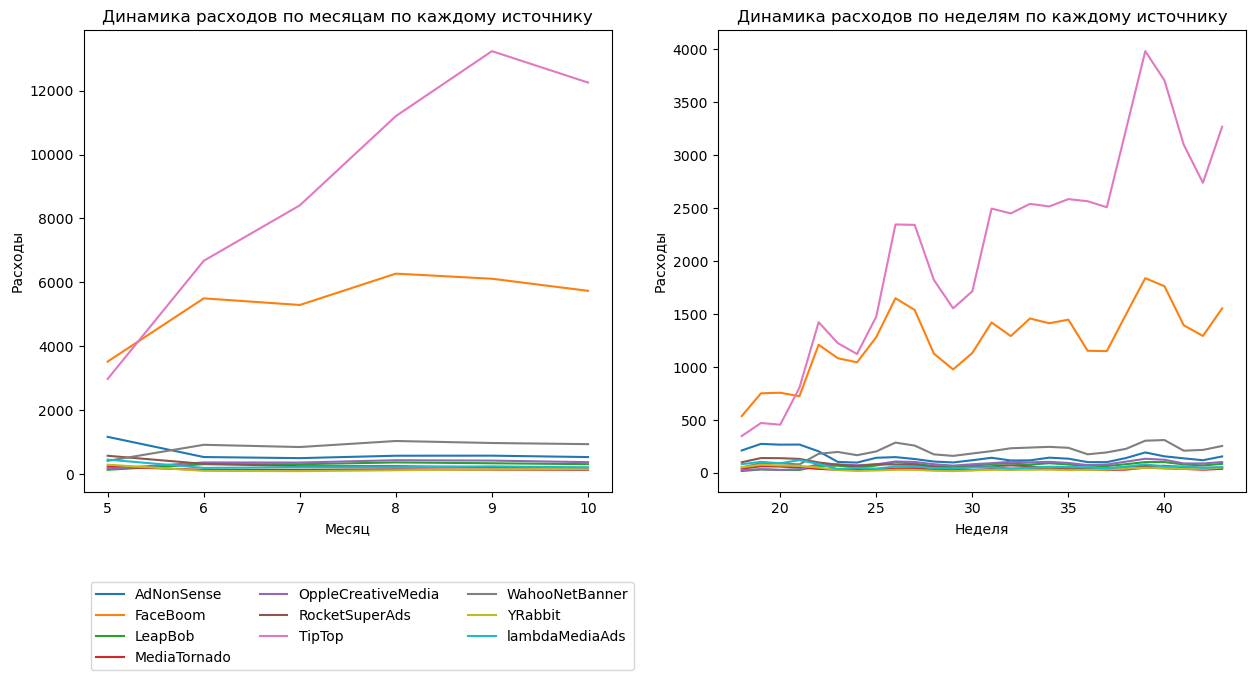

In [36]:
ax1 = plt.subplot(1, 2, 1)
(costs
 .pivot_table(
     index='month_dt',
     columns='channel',
     values='costs',
     aggfunc='sum')
 .plot(figsize=(15, 6), ax=ax1)
)
ax1.set_title('Динамика расходов по месяцам по каждому источнику')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Расходы')
ax1.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')

ax2 = plt.subplot(1, 2, 2)
(costs
 .pivot_table(
     index='week_dt',
     columns='channel',
     values='costs',
     aggfunc='sum')
 .plot(figsize=(15, 6), ax=ax2, legend=False)
)
ax2.set_title('Динамика расходов по неделям по каждому источнику')
ax2.set_xlabel('Неделя')
ax2.set_ylabel('Расходы')
plt.show()

Расходы на канал TipTop активно росли с мая до начала сентября, выросли более чем в 4 раза с 3 тыс до 13 тыс ден. ед., последний месяц немного снизились.

Расходы на канал FaceBoom имеют более стабильную динамику, ежемесячно расходы колеблятся в районе 4-6 тыс ден.ед.

 На графике по неделям видна некоторая цикличность расходов.

Рассмотрим детальнее динамику остальных рекламных каналов, изменив масштаб оси Y, этот график для них неинформативен.

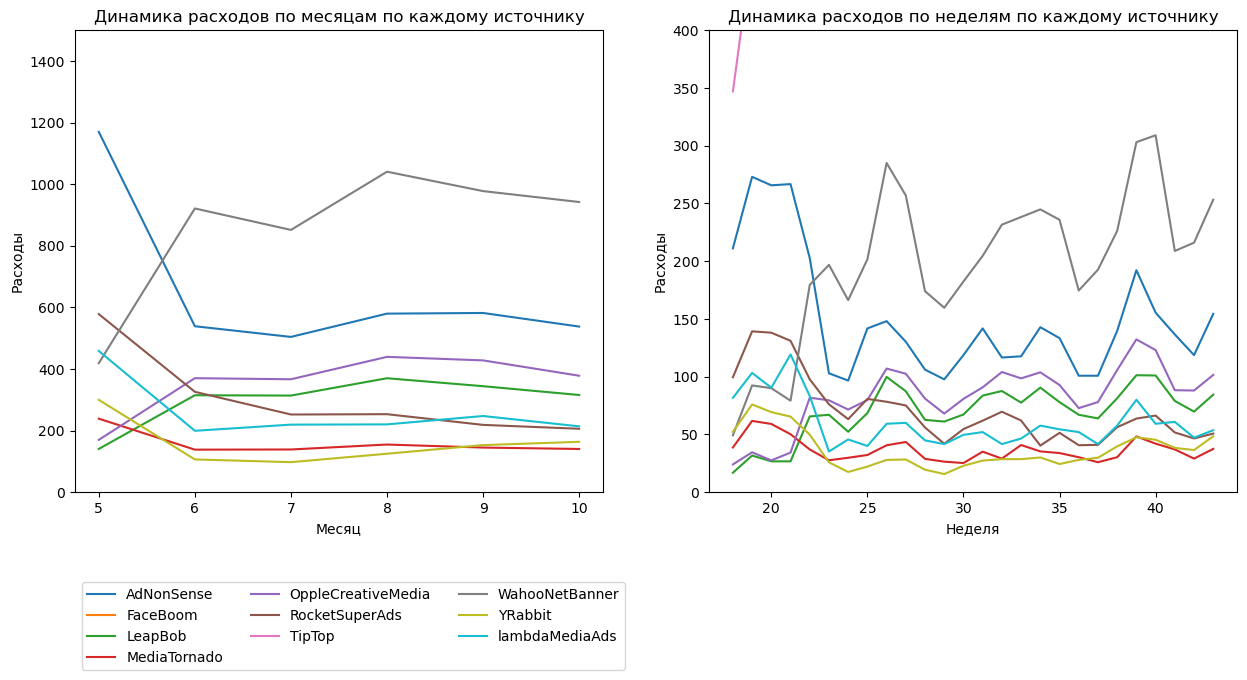

In [37]:
ax1 = plt.subplot(1, 2, 1)
(costs
 .pivot_table(
     index='month_dt',
     columns='channel',
     values='costs',
     aggfunc='sum')
 .plot(figsize=(15, 6), ax=ax1)
)
plt.ylim(0, 1500)
ax1.set_title('Динамика расходов по месяцам по каждому источнику')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Расходы')
ax1.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')

ax2 = plt.subplot(1, 2, 2)
(costs
 .pivot_table(
     index='week_dt',
     columns='channel',
     values='costs',
     aggfunc='sum')
 .plot(figsize=(15, 6), ax=ax2, legend=False)
)
plt.ylim(0, 400)
ax2.set_title('Динамика расходов по неделям по каждому источнику')
ax2.set_xlabel('Неделя')
ax2.set_ylabel('Расходы')
plt.show()

 Месячные расходы по разным каналам имеют стабильную динамику, изменения незначительные кроме перехода с мая на июнь: у большинства каналов расходы с июня снизились, у трех каналов: LeapBob, OppleCreativeMedia и WahooNetBanner, расходы с июня возросли.
 На графике по неделям заметна некоторая цикличность расходов.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [38]:
(profiles
 .pivot_table(
     index='channel',
     values='acquisition_cost',
     aggfunc='mean')
 .sort_values(by='acquisition_cost')
)

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054


Самые "дорогие" клиенты пришли из канала TipTop, их стоимость 2,8 ден. ед.


### Вывод
     
    - В ходе маркетингового анализа рассчитали общую сумму расходов на маркетинг.
    - Выяснили, как траты распределены по рекламным источникам.
    - Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
    - Рассчитали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Общая сумма расходов составила 105 497 ден.ед.
     
По затратам на рекламу сильно выбиваются два канала: FaceBoom и TipTop. 
     
На канал TipTop приходится половина всех расходов - 52%, на канал FaceBoom треть расходов - 31%.
     
Расходы на остальные каналы распределены почти равномерно: от 1 до 5 %.

Расходы на канал TipTop активно росли с мая до начала сентября, выросли более чем в 4 раза с 3 тыс до 13 тыс ден. ед., последний месяц немного снизились.

Расходы на канал FaceBoom имеют более стабильную динамику, ежемесячно расходы колеблятся в районе 4-6 тыс ден.ед.

Месячные расходы по остальным каналам имеют стабильную динамику, изменения незначительные кроме перехода с мая на июнь: у большинства каналов расходы с июня снизились, у трех каналов: LeapBob, OppleCreativeMedia и WahooNetBanner, расходы с июня возросли. На графике по неделям заметна некоторая цикличность расходов.
     
На графике по неделям видна некоторая цикличность расходов.
     
Самые "дорогие" клиенты пришли из канала TipTop, их стоимость 2,8 ден. ед.

## Оценка окупаемости рекламы

### Окупаемость без разбивки по критериям

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Исключим из анализа органических пользователей, потому что мы хотим оценить окупаемость рекламы и нас интересуют только пользователи, пришедшие из рекламных каналов. Покупки органических пользователей будут искажать результаты.

In [39]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [40]:
advertising_profiles = profiles.query('channel != "organic"')

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     advertising_profiles, orders, observation_date, horizon_days
)

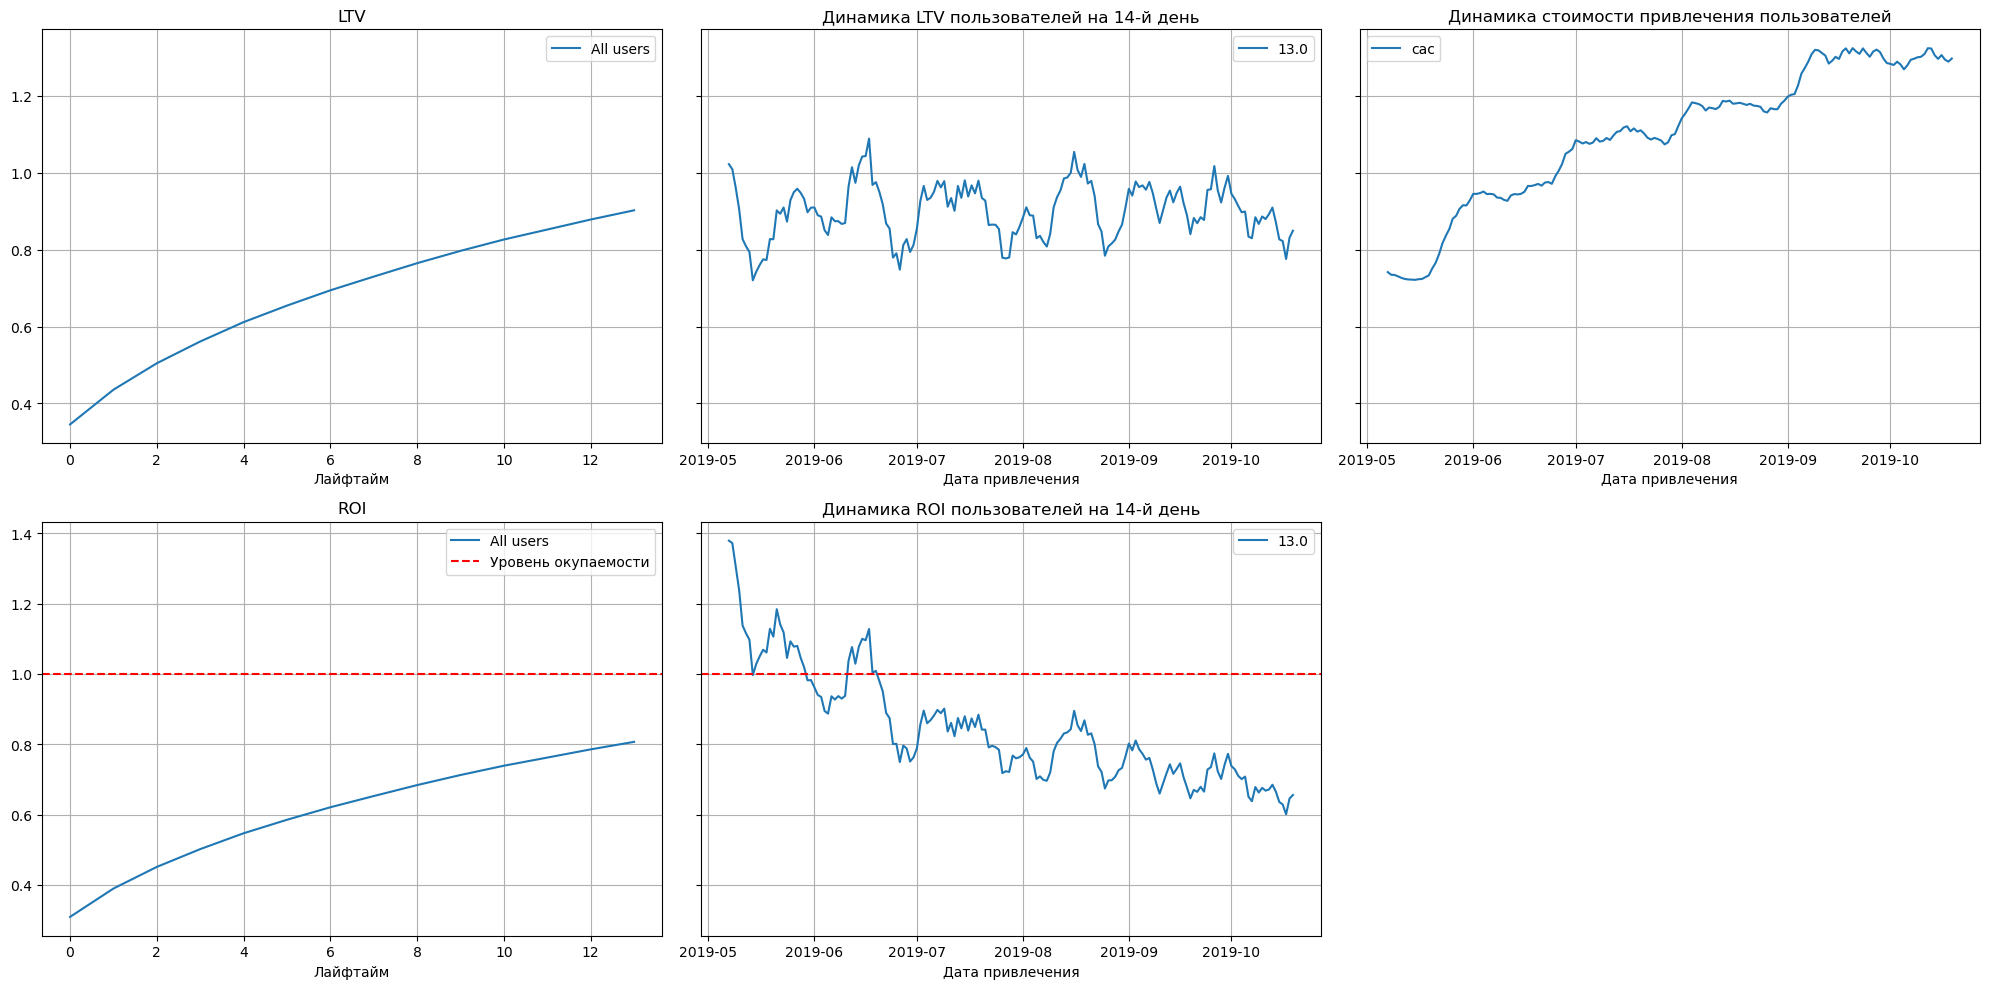

In [42]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

     
**Вывод:**
     
LTV постепенно растет со временем, как и должно быть, здесь все в порядке.
Самый низкий LTV 14го дня был для пользователей, привлеченных в середине мая, самый высокий - для привлеченных в середине июня.

По динамике САС мы видим, что стоимость привлечения 1 пользователя за 6 мес выросла в 2 раза.

График ROI показывает, что на 14й день реклама окупилась только на 80%.

Динамика ROI показывает, что на 14й день окупались только пользователи, привлеченные до конца мая и немного в середине июня. Сравнив график с графиком динамики САС мы видим, что пользователи окупались только когда реклама была дешевле (в мае), или немного снизилась в цене в середине июня.
Видимо, окупаемость снижалась, потому что стоимость рекламы росла сильнее, чем количество и качество привлеченных платящих пользователей.

###  Конверсия, удержание пользователей и динамика их изменения.

Построим и изучим графики конверсии и удержания.

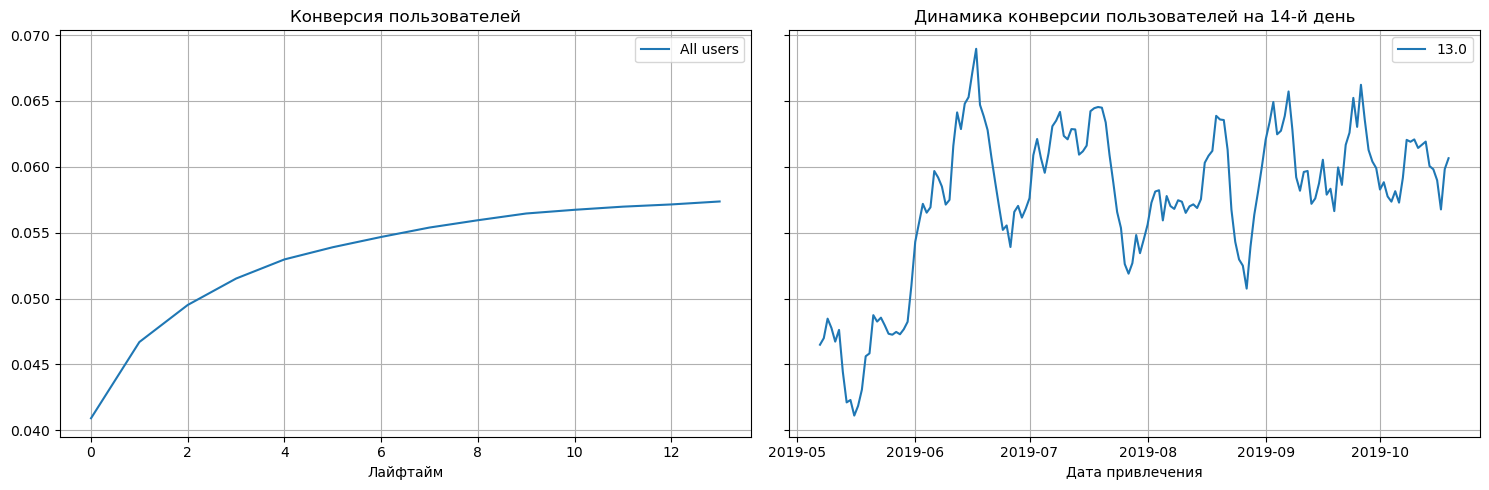

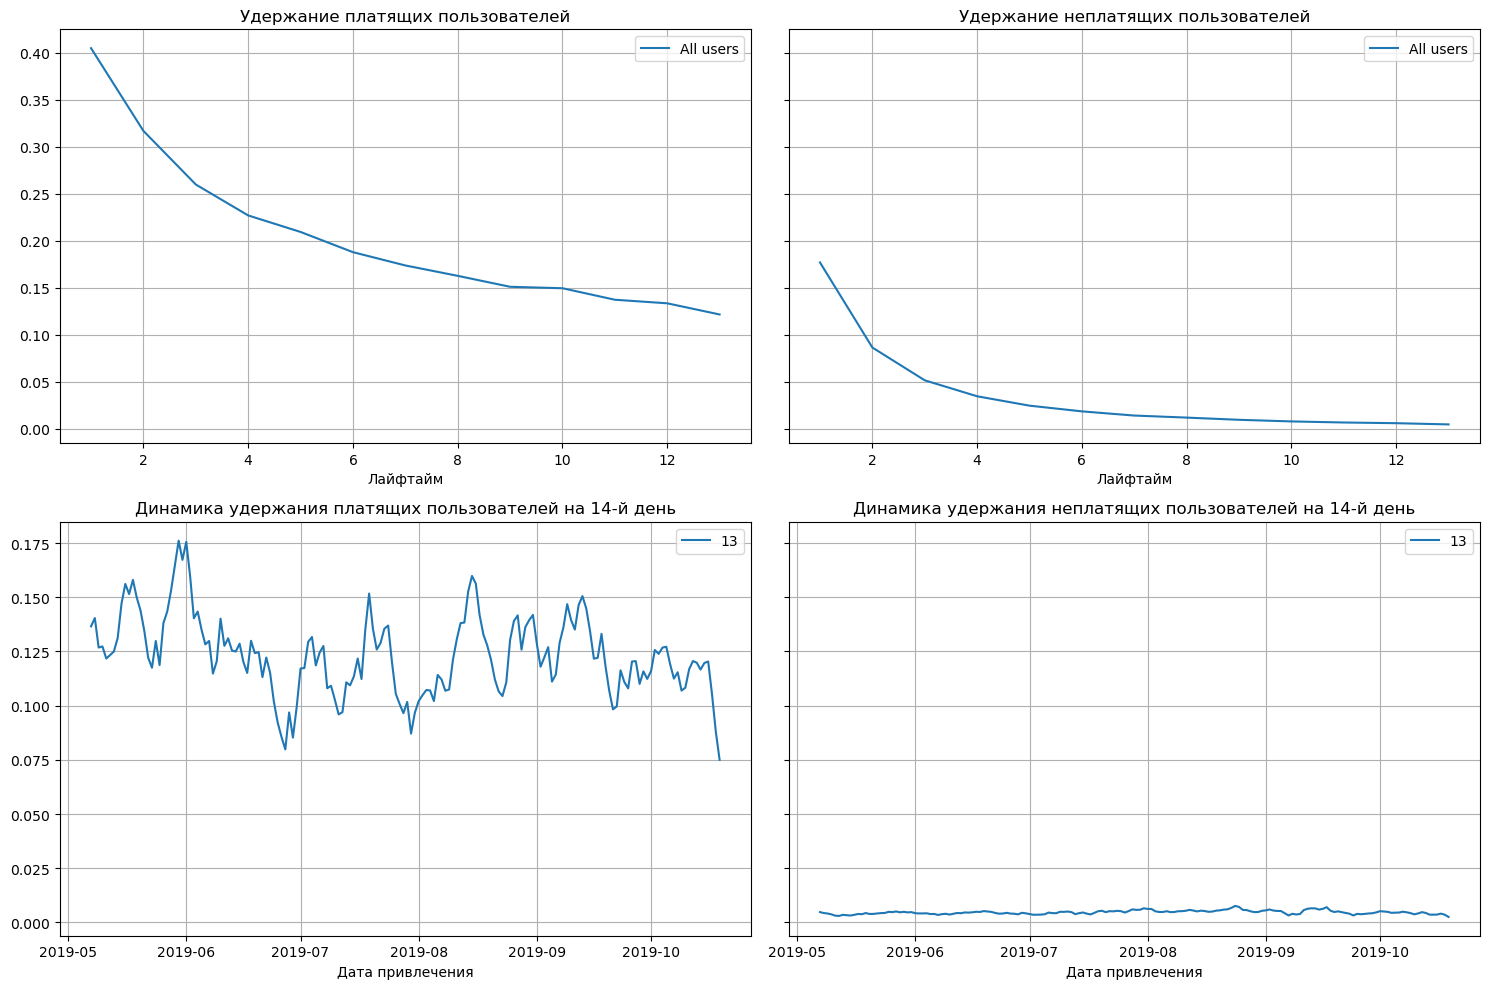

In [43]:
conversion_raw, conversion, conversion_history = (get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days)
)
retention_raw, retention, retention_history = (get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days)
)
plot_conversion(conversion, conversion_history, horizon_days)
plot_retention(retention, retention_history, horizon_days)


**Вывод:**

Самая высокая конверсия была у пользователей, привлеченных в середине июня. Самая низкая - в середине мая.

Платящие пользователи лучше удерживались на 14й день, если были привлечены в середине и конце мая, а также середине августа.
Неплатящие пользователи удерживались на 14й день одинаково за весь период анализа.

### Окупаемость с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     advertising_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

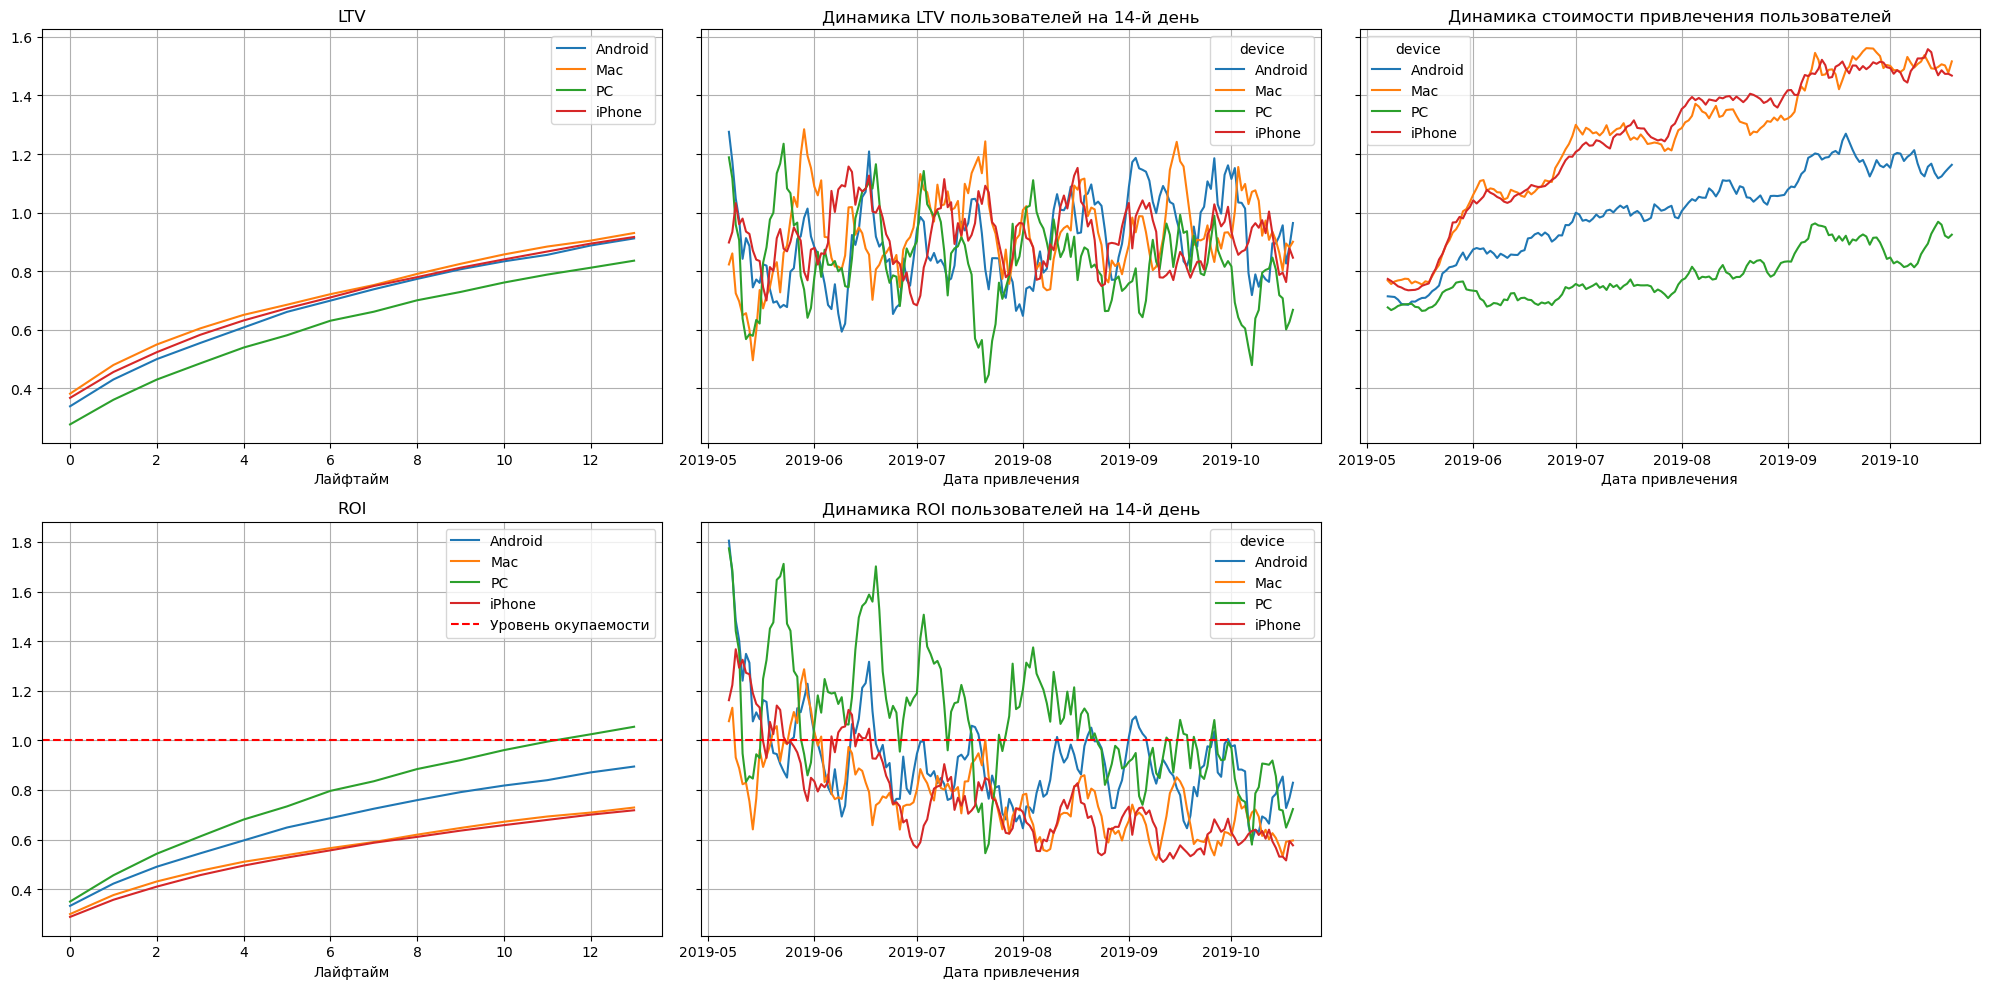

In [45]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

 
**Вывод:**


Меньше всего денег приносят клиенты, пользующиеся PC. Остальные три устройства близки по значениям LTV.

Стоимость привлечения для пользователей с устройствами Mac и iPhone выросла сильнее всего за весь период и оказалась самой высокой среди всех устройств, самая низкая и меньше всего возросшая - для пользователей на PC.

Только пользователи с PC вышли на окупаемость к 12му дню, к 14му показав окупаемость примерно 8%.
Пользователи с остальными устройствами не окупились.

По динамике окупаемости 14го дня можно сказать, что в начале периода - май-июнь - на окупаемость иногда выходили все пользователи. С июля периодическую окупаемость показывали только пользователи PC.

Проверим гипотезу о том, что больше всего покупателей с устройствами Mac и iPhone приходит из США. Эта информация далее нам поможет сделать выводы по проекту. 

Для этого составим сводную таблицу по странам и устройствам:

In [46]:
(advertising_profiles
 .pivot_table(
     index=['region', 'device'],
     values='user_id',
     aggfunc='nunique')
 .sort_values(by=['region', 'user_id'], ascending=False)
)

user_id
region        device          
United States iPhone     27548
              Mac        15424
              Android    12436
              PC          6421
UK            PC          4551
              Android     3243
              iPhone      2274
              Mac         1086
Germany       PC          3797
              Android     2849
              iPhone      1862
              Mac         1020
France        PC          4384
              Android     3313
              iPhone      2198
              Mac         1163

Гипотеза подтвердилась - больше всего покупателей с устройствами Mac и iPhone в США.

### Окупаемость с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [47]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     advertising_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

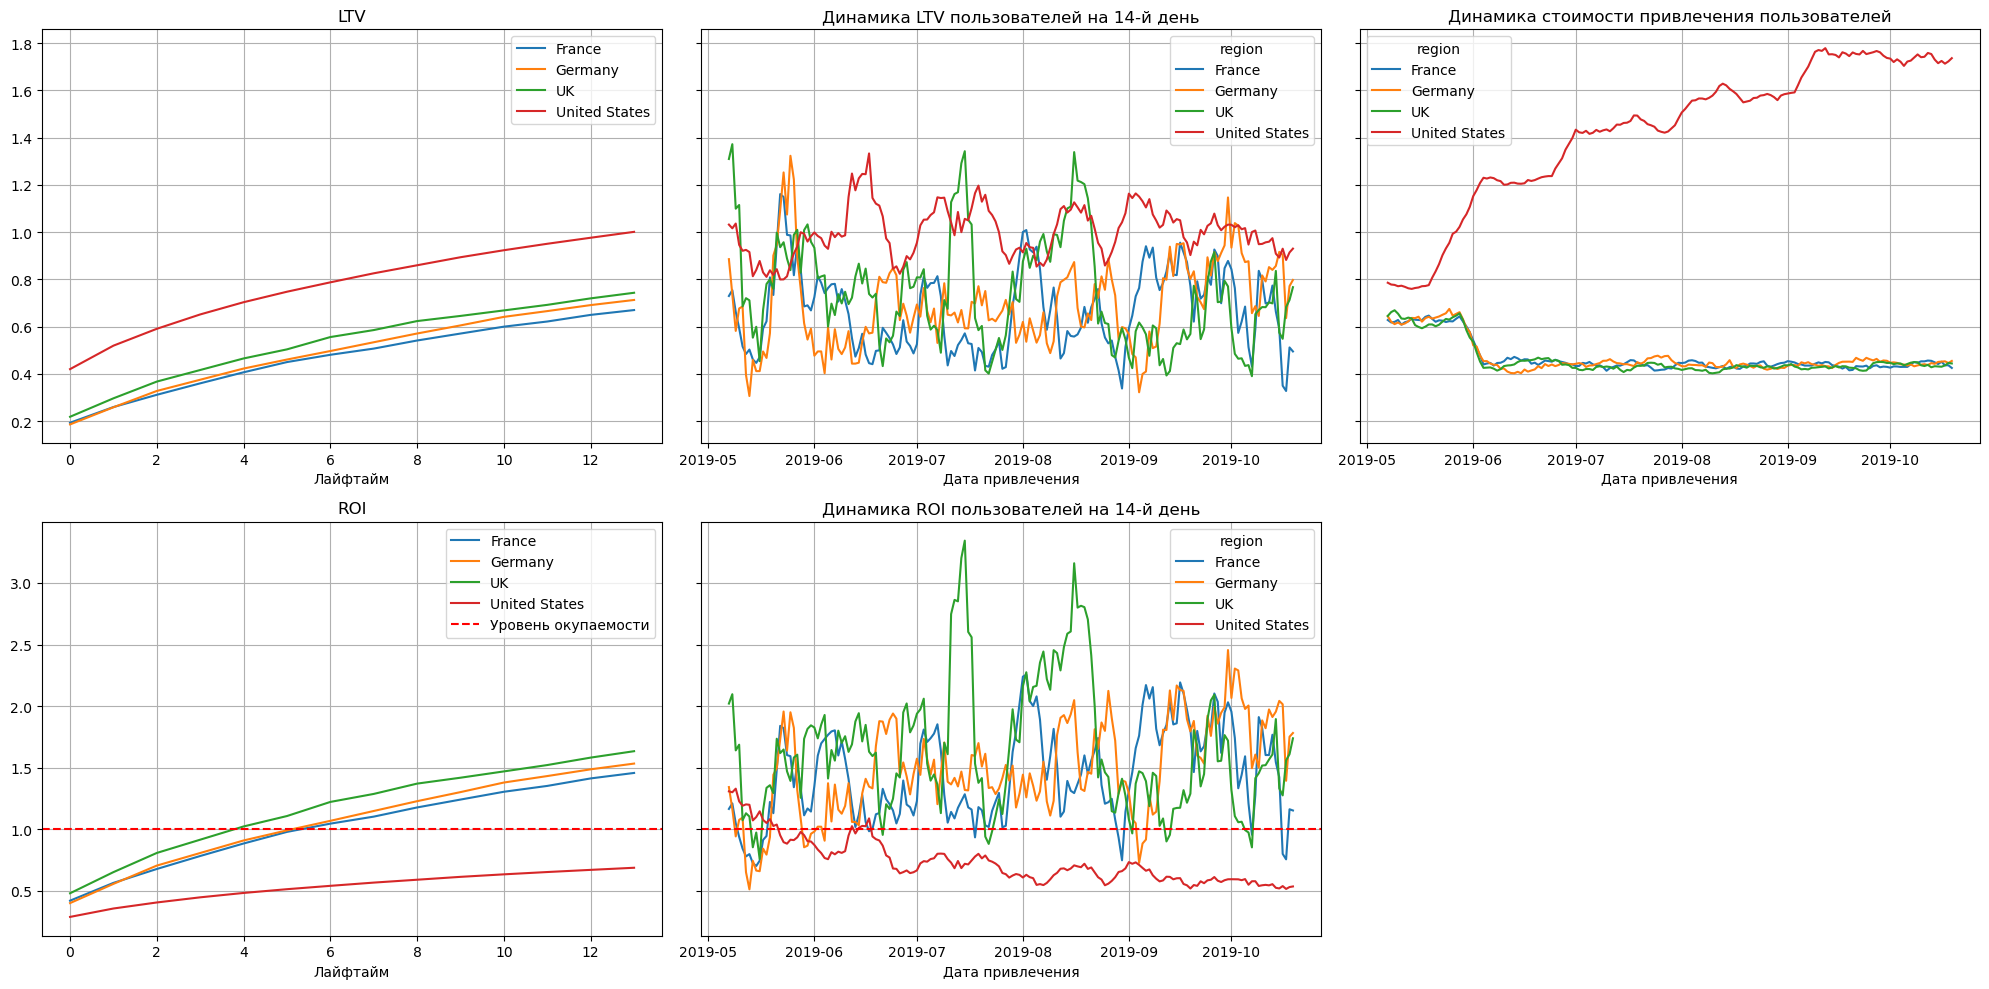

In [48]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


**Вывод:**


Пользователи из США приносят заметно больше денег, чем остальные (они в свою очередь близки по значениям LTV).

В динамике стоимости привлечения США тоже "лидирует": стоимость привлечения пользователей этой страны в 3-4,5 раза превышает стоимость привлечения пользователей из других стран. Повышение стоимости происходило скачкообразно, особенно резкое повышение произошло в мае.

Тогда как CAC пользователей других стран снизился к началу июня и далее держался примерно на одном уровне для всех стран.

График окупаемости в разрезе стран сильно отличается от общей окупаемости рекламных компаний. Оказывается, окупаются рекламные компании для всех стран, кроме США. Наилучшую окупаемость показывает Великобритания, потом идет Германия и Франция. Все они окупаются к 14 дню на 150-160%. США окупается только на 70%.

По динамике окупаемости 14го дня мы видим, что  реклама для США окупалась только для пользователей, привлеченных до середины мая, далее ROI плавно снижался весь период. Остальные страны находились над чертой окупаемости почти весь период. У Великобритании было 2 заметных пика окупаемости: привлечение в середине июля и в середине августа. 
     
Проблема окупаемости рекламы в США связана с резким и продолжительным повышением стоимости расходов на рекламу, стоимость привлечения росла на протяжении всех 5 месяцев. 

При этом клиенты из США приносят больше всего денег из всех рассматриваемых стран, но они все равно не окупаются из-за высоких расходов на их привлечение.

### Окупаемость с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
     advertising_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

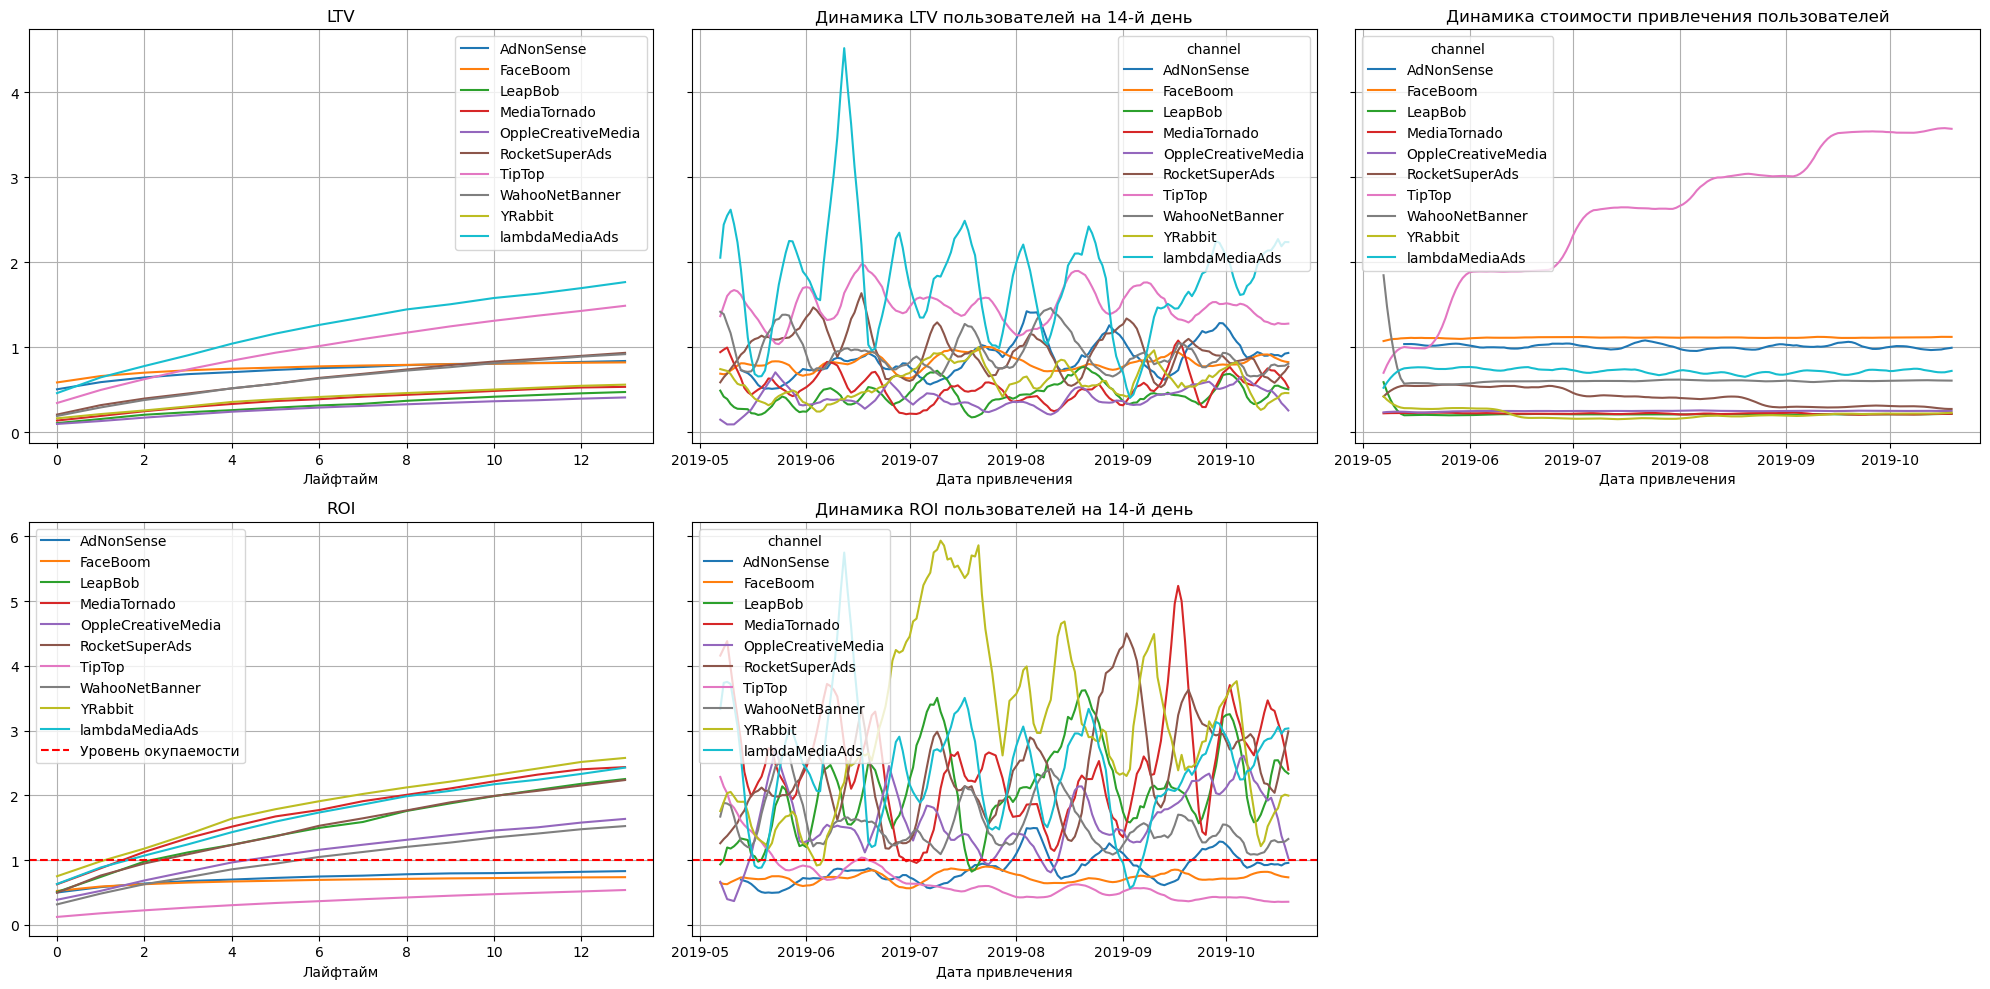

In [50]:
# строим графики и убираем шум на них, сглаживаем данные
filter_data(ltv_history, 7)
filter_data(roi_history, 7)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

 
**Вывод:**


Наибольшая ценность у клиентов, пришедших из lambdaMediaAds, также заметно отрывается от остальных TipTop. Самая низкая ценность клиентов из OppleCreativeMedia. 

На графике динамики LTV заметен пик источника lambdaMediaAds: во второй половине июня оттуда были привлечены самые платящие пользователи.
     
Стоимость привлечения пользователей всех каналов была стабильна или показывала слабую динамику, кроме канала TipTop, расходы на который сильно возрастали каждый месяц, особенно в первый месяц (рост в 2 раза). 

Среди окупившихся лидером является YRabbit - 260% к 14 дню, самая низкая окупаемость у WahooNetBanner - 150% к 14 дню.

Заметен большой отрыв в окупаемости пользователей из источника YRabbit, привлеченных в середине июля.

Рекламные компании в источниках: TipTop, FaceBoom и AdNonSense не окупились за 14 дней. 

TipTop очень дорогой канал, несмотря на качественных покупателей, он не может окупиться из-за стоимости привлечения. От него следует отказаться.

Посмотрим на качество пользователей с других убыточных каналов: FaceBoom и AdNonSense. Для этого построим графики конверсии и удержания.   

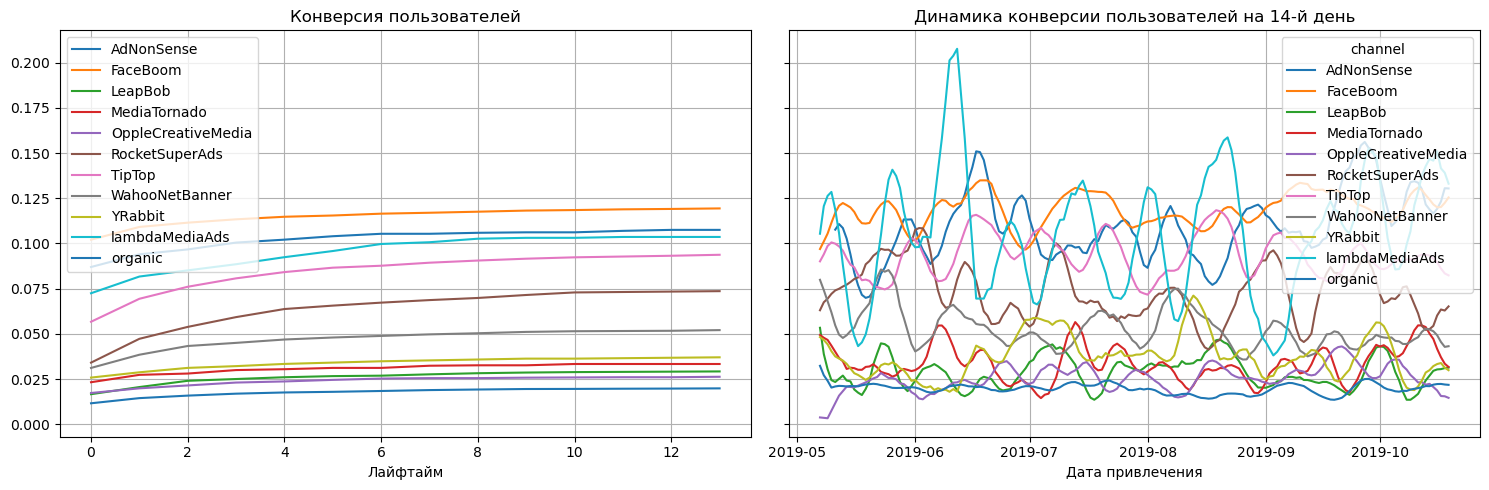

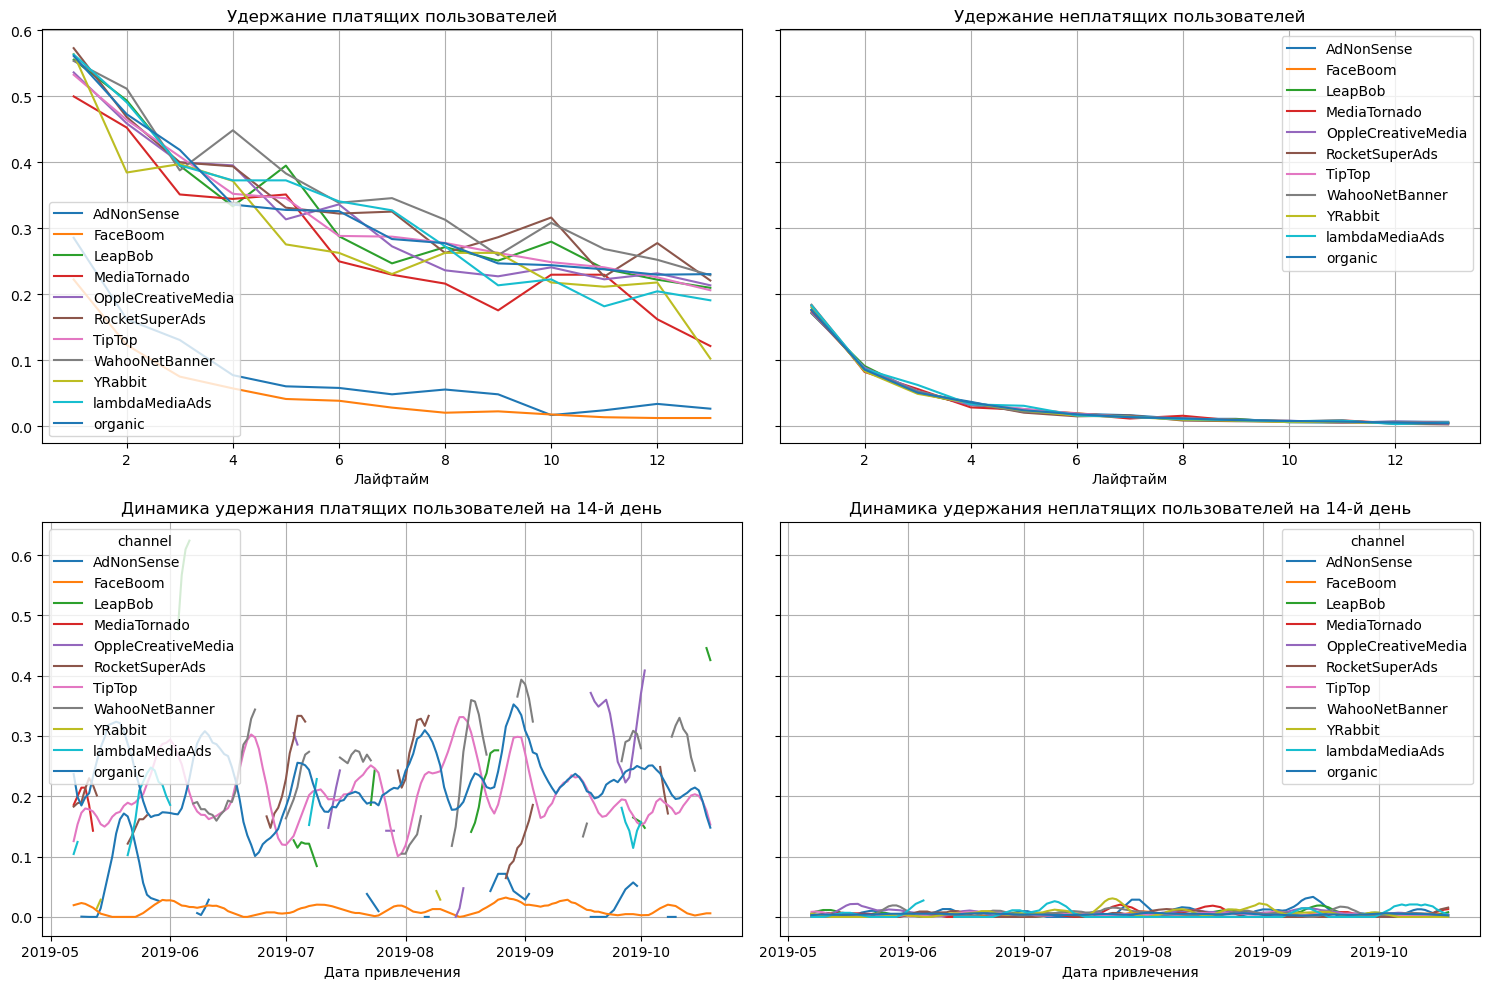

In [51]:
# графики конверсии и удержания 
conversion_raw, conversion, conversion_history = (get_conversion(
    profiles, 
    orders, 
    observation_date, 
    horizon_days,
    dimensions=['channel'])
)
retention_raw, retention, retention_history = (get_retention(
    profiles, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions=['channel'])
)
filter_conversion_history = filter_data(conversion_history, 5)
filter_retention_history = filter_data(retention_history, 5)
plot_conversion(conversion, filter_conversion_history, horizon_days)
plot_retention(retention, filter_retention_history, horizon_days)

    
У каналов FaceBoom и AdNonSense самые высокие конверсии в платящих пользователей, но при этом самое низкое удержание, пользователи просто сразу уходят.
Каналы привлекают пользователей низкого качества, поэтому реклама в них не окупается.

## Общий вывод

В ходе ПОДГОТОВКИ ДАННЫХ К АНАЛИЗУ были проверены датасеты на дубликаты и пропуски, изменены типы данных:

- Дубликаты и пропуски в датасетах visits, orders, costs не найдены.

- Привели названия столбцов к написанию в "змеином" регистре
- Изменили типы данных в столбцах с информацией о дате и времени (с object на datetime) 

### Вывод по исследовательскому анализу данных

В ходе анализа составили профили пользователей в датасете profiles. Определили минимальную и максимальную даты привлечения. Посчитали доли платящих пользователей по разным критериям.

Минимальная дата привлечения - 1 мая 2019 года.

Максимальная дата привлечения - 27 октября 2019 года.

Рейтинг конверсии в платящих пользователей по странам:

    США 6,9 %
    Германия 4,11 %
    Великобритания 3,98 %
    Франция 3, 79 %

Рейтинг конверсии в платящих пользователей по устройствам:

    Mac 6,36 %
    iPhone 6,21 %
    Android 5,85%
    PC 5,05 %

Топ-5 рекламных каналов по конверсии в платящих пользователей:

    FaceBoom - 12,2 %
    AdNonSense - 11,34 %
    lambdaMediaAds - 10,47%
    TipTop - 9,6 %
    RocketSuperAds - 7,91 %

### Вывод по маркетинговому анализу

В ходе маркетингового анализа рассчитали общую сумму расходов на маркетинг. Выяснили, как траты распределены по рекламным источникам. Построили визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Рассчитали, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Общая сумма расходов составила 105 497 ден.ед.

По затратам на рекламу сильно выбиваются два канала: FaceBoom и TipTop.

На канал TipTop приходится половина всех расходов - 52%, на канал FaceBoom треть расходов - 31%.

Расходы на остальные каналы распределены почти равномерно: от 1 до 5 %.

Расходы на канал TipTop активно росли с мая до начала сентября, выросли более чем в 4 раза с 3 тыс до 13 тыс ден. ед., последний месяц немного снизились.

Расходы на канал FaceBoom имеют более стабильную динамику, ежемесячно расходы колеблятся в районе 4-6 тыс ден.ед.

Месячные расходы по остальным каналам имеют стабильную динамику, изменения незначительные кроме перехода с мая на июнь: у большинства каналов расходы с июня снизились, у трех каналов: LeapBob, OppleCreativeMedia и WahooNetBanner, расходы с июня возросли.

На графике по неделям видна некоторая цикличность расходов.

Стоимость привлечения одного пользователя (CAC) из каждого источника:

    LeapBob - 0.21
    MediaTornado - 0.22
    YRabbit - 0.22
    OppleCreativeMedia - 0.25
    RocketSuperAds - 0.41
    WahooNetBanner - 0.60
    lambdaMediaAds - 0.73
    AdNonSense - 1.01
    FaceBoom - 1.11
    TipTop - 2.80

Самые "дорогие" клиенты пришли из канала TipTop, их стоимость 2,8 ден. ед.

### Вывод по окупаемости рекламы
 
 **Общая окупаемость** 
  
Проанализировали общую окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Стоимость клиента постепенно растет со временем, как и должно быть, здесь все в порядке. Самый низкий LTV 14го дня был для пользователей, привлеченных в середине мая, самый высокий - для привлеченных в середине июня.

По динамике расходов мы видим, что стоимость привлечения за 6 мес выросла в среднем с 0,75 до 1,3 ден.ед. за 1 пользователя.

График окупаемости показывает, что на 14й день реклама в целом окупилась только на 80%.

Динамика окупаемости показывает, что на 14й день окупались только пользователи, привлеченные до конца мая и немного в середине июня. Сравнив график с графиком динамики расходов, мы видим, что пользователи окупались только когда реклама была дешевле (то есть в мае), или немного снизилась в цене в середине июня. Видимо, окупаемость снижалась, потому что стоимость рекламы росла сильнее, чем количество и качество привлеченных платящих пользователей.

**Конверсия, удержание пользователей и динамика их изменения**

Самая высокая конверсия была у пользователей, привлеченных в середине июня. Самая низкая - в середине мая.

Платящие пользователи лучше удерживались на 14й день, если были привлечены в середине и конце мая, а также середине августа.
Неплатящие пользователи удерживались на 14й день одинаково за весь период анализа.

**Окупаемость с разбивкой по устройствам**

Меньше всего денег приносят клиенты, пользующиеся PC. Клиенты на остальных устройствах имеют близкую по значениям ценность.

Стоимость привлечения для пользователей с устройствами Mac и iPhone выросла сильнее всего за весь период и оказалась самой высокой среди всех устройств, самая низкая и меньше всего возросшая - для пользователей на PC.

Только пользователи с PC вышли на окупаемость к 12му дню, к 14му показав окупаемость примерно 8%. Пользователи с остальными устройствами не окупились.

По динамике окупаемости 14го дня можно сказать, что в начале периода - май-июнь - на окупаемость иногда выходили все пользователи. С июля периодическую окупаемость показывали только пользователи PC.

**Окупаемость с разбивкой по странам**

Пользователи из США приносят заметно больше денег, чем остальные (они в свою очередь близки по значениям LTV).

В динамике стоимости привлечения США тоже "лидирует": стоимость привлечения пользователей этой страны в 3-4,5 раза превышает стоимость привлечения пользователей из других стран. Повышение стоимости происходило скачкообразно, особенно резкое повышение произошло в мае.

Тогда как стоимость привлечения пользователей других стран снизилась к началу июня и далее держалась примерно на одном уровне для всех стран.

График окупаемости в разрезе стран сильно отличается от общей окупаемости рекламных компаний. Оказалось, что окупаются рекламные компании для всех стран, кроме США. 

Наилучшую окупаемость показывает Великобритания, потом идет Германия и Франция. Все они окупаются к 14 дню на 150-160%. США окупается только на 70%.

По динамике окупаемости 14го дня мы видим, что реклама для США окупалась только для пользователей, привлеченных до середины мая, далее окупаемость плавно снижалась весь период.

Остальные страны находились над чертой окупаемости почти весь период. У Великобритании было 2 заметных пика окупаемости: привлечение в середине июля и в середине августа. 

**Окупаемость с разбивкой по рекламным каналам**

Больше всего денег принесли клиенты, пришедшие из lambdaMediaAds, также заметно отрывается от остальных TipTop. Самая низкая ценность клиентов из OppleCreativeMedia.

На графике динамики ценности клиента заметен пик источника lambdaMediaAds: во второй половине июня оттуда были привлечены самые платящие пользователи.

Стоимость привлечения пользователей всех каналов была стабильна или показывала слабую динамику, кроме канала TipTop, расходы на который сильно возрастали каждый месяц, особенно в первый месяц (рост в 2 раза). 

Среди окупившихся лидером является YRabbit - 260% к 14 дню, самая низкая окупаемость у WahooNetBanner - 150% к 14 дню.

Заметен большой отрыв в окупаемости пользователей из источника YRabbit, привлеченных в середине июля.

Рекламные компании в источниках: TipTop, FaceBoom и AdNonSense за 14 дней так и не окупились.

TipTop очень дорогой канал, несмотря на качественных привлекаемых покупателей, он не может окупиться из-за стоимости привлечения.

У каналов FaceBoom и AdNonSense самые высокие конверсии в платящих пользователей, но при этом самое низкое удержание, пользователи просто сразу уходят. Каналы привлекают пользователей низкого качества, поэтому реклама в них не окупается. 

### Итоговый вывод

Реклама, направленная на привлечение пользователей в целом, не окупилась.

На общую слабую окупаемость повлияла неудача рекламной компании в США, потому как в остальных странах реклама окупилась на 150-160%.

Проблема окупаемости рекламы в США связана с резким и продолжительным повышением стоимости расходов на рекламу, стоимость привлечения росла на протяжении всех 5 месяцев. 

При этом клиенты из США приносят больше всего денег из всех рассматриваемых стран, но они все равно не окупаются из-за высоких расходов на их привлечение.

Расходы на канал TipTop составляют 52% всего рекламного бюджета. 

Заметна корреляция динамики роста расходов на канал TipTop с динамикой роста расходов на рекламу в США и привлечения пользователей устройств Mac и iPhone. Мы установили, что больше всего пользователей устройств Mac и iPhone находится в США.

Можно сделать вывод, что рекламная компания с каналом TipTop является убыточной и повлияла на окупаемость рекламы в целом.

РЕКОМЕНДАЦИИ

Следует отказаться от размещения рекламы в каналах: TipTop, FaceBoom и AdNonSense.

TipTop очень дорогой канал, несмотря на качественных привлекаемых покупателей, он не может окупиться из-за стоимости привлечения.

У каналов FaceBoom и AdNonSense самые высокие конверсии в платящих пользователей, но при этом самое низкое удержание, пользователи просто сразу уходят. Каналы привлекают пользователей низкого качества, поэтому реклама в них не окупается. 

Можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками.